## Exploratory Data Analysis

Like every project, the start of this project is via exploratory data analysis.

The basic aim of our data analysis is to understand what data we have, the size of the dataset, and to explore any patters that can be dug out easily.

----

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

In [2]:
DATA_DIR = "../data/"
DATA_FILENAME = "wiki_movie_plots_deduped.csv"

### 1. Loading the Data

In [3]:
data = pd.read_csv(DATA_DIR+DATA_FILENAME)

In [4]:
data.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [5]:
print("The shape of the data is: {}".format(data.shape))

The shape of the data is: (34886, 8)


In [6]:
data.describe()

,Release Year
count,34886.000000
mean,1981.314252
std,27.815174
min,1901.000000
25%,1957.000000
50%,1988.000000
75%,2007.000000
max,2017.000000


## Checking for NaN values in the dataframe

In [7]:
data.isna().sum()

Release Year           0
Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
dtype: int64

Except cast, all the columns are filled up! This is a good sign. The data seems to be clean!

#### Idea
We can go about predicting the cast for the movie. Might be very difficult for the model to do so! And at the end we can cross check manually on test set (the rows for which the cast is missing) how our model is performing!

Not the best of ideas though!

## Analyzing years

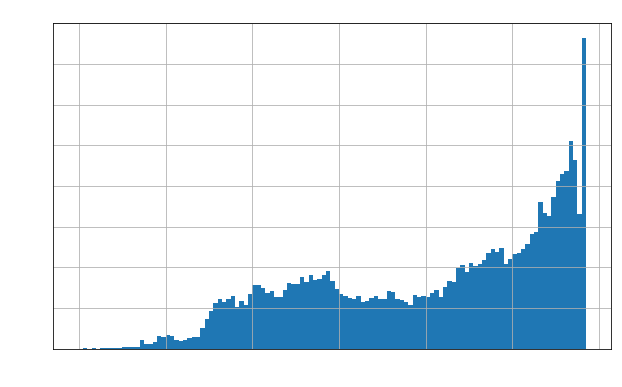

In [8]:
with plt.rc_context({'xtick.color':'white', 'ytick.color':'white'}):
    data.hist('Release Year', bins=range(1900,2018,1), figsize=(10,6))
    plt.title('Distribution of movie release year', color = 'white')
    plt.xlabel('Year', color='white')
    plt.ylabel('Counts', color='white')
    plt.show()

## Analyzing origin/ethnicity

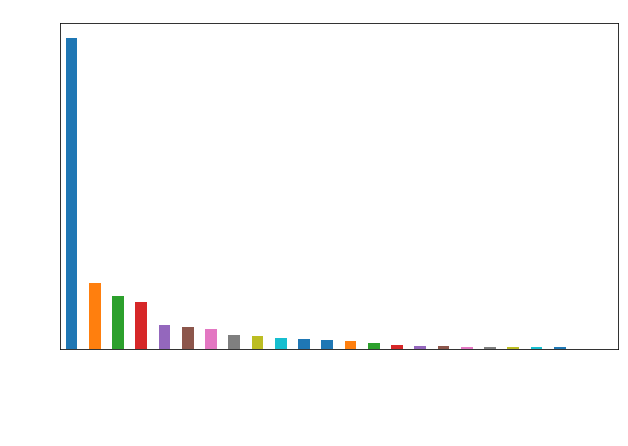

In [9]:
with plt.rc_context({'xtick.color':'white', 'ytick.color':'white'}):
    pd.value_counts(data['Origin/Ethnicity']).plot(kind="bar", figsize=(10,6))
    plt.title('Distribution of Origin/Ethnicity', color='white')
    plt.xlabel('Origin/Ethnicity', color='white')
    plt.ylabel('Counts', color='white')
    

Quite a variety we have for the orgin/ethnicity of the movies.

The American movies being in abundance.

## Analyzing director names

In [10]:
pd.value_counts(data['Director'])

Unknown                                1124
Michael Curtiz                           79
Hanna-Barbera                            77
Lloyd Bacon                              66
Jules White                              63
John Ford                                59
Allan Dwan                               58
William A. Seiter                        56
Norman Taurog                            56
Richard Thorpe                           55
Mervyn LeRoy                             54
Alfred Hitchcock                         53
Raoul Walsh                              53
William Beaudine                         52
Gordon Douglas                           51
K. Raghavendra Rao                       51
Henry Hathaway                           50
Alfred E. Green                          50
K. Balachander                           50
George Marshall                          49
Robert Z. Leonard                        48
Roy Del Ruth                             47
William A. Wellman              

Some movies are without a director - marked by Unknown!

There are some movies which have 2 directors as well.

The names are separated by comma "," , 'and'.
Sometimes director name is also present with "Director:" keyword present before the director name.

### Cleaning ideas
Director names can be made an array.

Each cell can be passes through the following checks:
- Presence of comma
- Presence of and
- Presence of the keyword "Director"

Split can be made on those keywords and the director names can be made into a list of strings!

## Analyzing Cast

In [12]:
pd.value_counts(data['Cast'])

Tom and Jerry                                                                                                                                                                                                                                     80
Three Stooges                                                                                                                                                                                                                                     56
The Three Stooges                                                                                                                                                                                                                                 47
Looney Tunes                                                                                                                                                                                                                                      37
Bugs Bunny          

Nothing fancy in here, but a lot of Tom and Jerry movies in the dataset! Infact a lot of animated movies in the dataset. Interesting to understand their plot!

## Analyzing Genre

In [13]:
pd.value_counts(data['Genre'])

unknown                                    6083
drama                                      5964
comedy                                     4379
horror                                     1167
action                                     1098
thriller                                    966
romance                                     923
western                                     865
crime                                       568
adventure                                   526
musical                                     467
crime drama                                 464
romantic comedy                             461
science fiction                             418
film noir                                   345
mystery                                     310
war                                         273
animation                                   264
comedy, drama                               236
sci-fi                                      221
family                                  

There are some unknown genres.
There are movies with multiple genres. We can separate them using the following keywords
- comma
- /
- Some tags are also separate by space. 
    - eg: "comedy, crime drama", 
    - eg: "comedy drama anime"; 
    
  while some spaces are just required: 
    - eg: "action, road movie, youth drama" 
    - eg: "apocalyptic thriller"
    
  Need to think of a way to handle this!

## Analyzing Plot!

Checking the length of words in the plot column.

This would help us understand if there are any empty values

In [16]:
len_plots = [len(i) for i in data['Plot']]

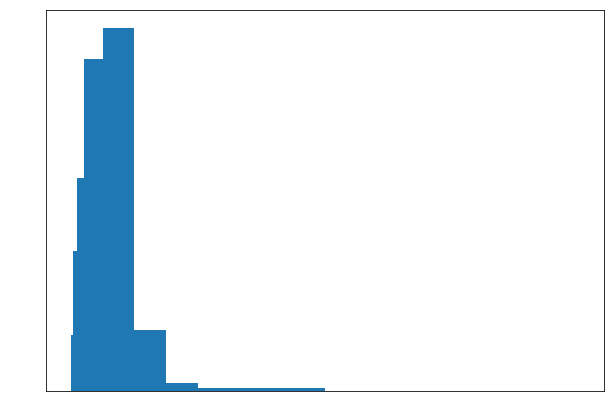

In [28]:
with plt.rc_context({'xtick.color':'white', 'ytick.color':'white'}):
    plt.figure(figsize=(10,7))
    plt.hist(len_plots, bins=[0,200,500,1000,2500,5000,7500,10000,20000,40000])
    plt.show()

Not a bad distribution!!

Just another check to see if there are any strings with 0 length!

In [30]:
zeros = [i for i in data['Plot'] if len(i)==0]

In [32]:
len(zeros)

0

Hurraaay!

All movies have some plot corresponding to them! :D :D :D

## PLAN
- We build on a task to categorize movie plots into genres using only plot text!

The subtasks involved in this are:
- Genre is a little messy. Clean up that data to get list of genres!
- Get the sentences into a model ingestible form. Separating at newline charachter or some steps like that!
- Use a Pre-trained model to perform the classification task!

### Key Takeaways
Doing this exercise, we aim to:
- learn how to use pre-trained models
- learn how to get text in shape for modelling exercise
- perform multi-label classification task

## Cleaning Genre Column

In [35]:
data.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [39]:
data.reset_index(inplace=True, drop=False)
data.rename(columns={'index': 'movie_id', 'Genre':'genre', 'Plot':'plot'}, inplace=True)

In [48]:
plot_data = data[['movie_id', 'plot', 'genre']]

In [49]:
plot_data.head()

,movie_id,plot,genre
0,0,"A bartender is working at a saloon, serving dr...",unknown
1,1,"The moon, painted with a smiling face hangs ov...",unknown
2,2,"The film, just over a minute long, is composed...",unknown
3,3,Lasting just 61 seconds and consisting of two ...,unknown
4,4,The earliest known adaptation of the classic f...,unknown


In [51]:
genres = data['genre']

In [52]:
genres

0                           unknown
1                           unknown
2                           unknown
3                           unknown
4                           unknown
5                           unknown
6                           western
7                            comedy
8                           unknown
9                           unknown
10                            short
11       short action/crime western
12                       short film
13                     biographical
14                           comedy
15                           comedy
16                            drama
17                            drama
18                           comedy
19                        adventure
20                            drama
21                          western
22                            drama
23                            drama
24                            drama
25                          unknown
26                            drama
27                          

To start with, split all cells with space(" "), comma(","), hyphen("-"), backslash("/")

This would give us multiple categories.

Idea is that we can go into nested categories later on!

Start with this, then analyze the distribution of different genres!

In [53]:
def split_it(x):
    return re.findall(r"[\w']+", x)

In [ ]:
def split_genres(plot_data):
    plot_data['genres'] = plot_data['genre'].apply(split_it)
    return

In [ ]:
split_genres(plot_data)

In [58]:
plot_data['genres']

0                              [unknown]
1                              [unknown]
2                              [unknown]
3                              [unknown]
4                              [unknown]
5                              [unknown]
6                              [western]
7                               [comedy]
8                              [unknown]
9                              [unknown]
10                               [short]
11       [short, action, crime, western]
12                         [short, film]
13                        [biographical]
14                              [comedy]
15                              [comedy]
16                               [drama]
17                               [drama]
18                              [comedy]
19                           [adventure]
20                               [drama]
21                             [western]
22                               [drama]
23                               [drama]
24              

Now find the categories that can be merged!

Eg: Romance, Romantic are the same. Find a way to merge them!

In [59]:
all_genre = [item for sublist in list(plot_data['genres']) for item in sublist]

In [66]:
if 'director' in all_genre:
    print("True")

In [60]:
from collections import Counter

In [62]:
pd.value_counts(all_genre)

drama             9419
comedy            7278
unknown           6083
action            2450
romance           1940
thriller          1780
crime             1607
horror            1593
western            974
musical            948
adventure          866
romantic           681
family             634
war                609
science            575
fiction            564
fantasy            561
film               549
mystery            481
animated           418
sci                398
fi                 398
noir               358
animation          349
biography          306
short              242
historical         224
social             223
suspense           162
anime              143
                  ... 
30min                1
disease              1
bram                 1
counterculture       1
masuma               1
saloni               1
ww1                  1
mordecai             1
bhoomika             1
uday                 1
staged               1
cbc                  1
chanchal   

Understanding the number of genres for each

In [69]:
num_genres = [len(i) for i in plot_data['genres']]

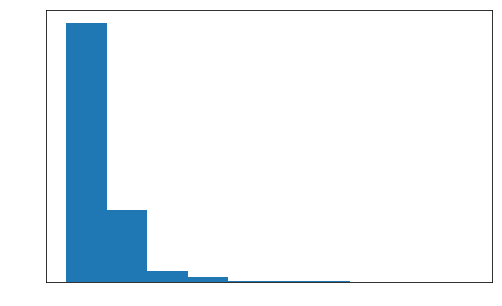

In [73]:
with plt.rc_context({'xtick.color':'white', 'ytick.color':'white'}):
    plt.figure(figsize=(8,5))
    plt.hist(num_genres)
    plt.show()

check manually for number of genres > 5!

In [76]:
plot_data['num_genres'] = plot_data['genres'].apply(len)

/Users/rachitjain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [84]:
sub_df = plot_data[plot_data['num_genres'] >= 5]

In [85]:
sub_df.shape

(247, 5)

In [86]:
sub_df

,movie_id,plot,genre,genres,num_genres
3438,3438,The tailcoat is custom made for renowned stage...,"drama, comedy; 6 separate stories","[drama, comedy, 6, separate, stories]",5
13490,13490,Shortly after the Soviet Union launches Sputni...,"animation, science fiction, drama, family","[animation, science, fiction, drama, family]",5
15636,15636,The film revolves around a special team of tra...,"family, live-action/animated film","[family, live, action, animated, film]",5
15797,15797,"In Germany, a bloodhound named Rex discovers a...","family, live-action/animated film","[family, live, action, animated, film]",5
16005,16005,Americans Ben and Sean (Max Minghella and Emil...,"action thriller, sci-fi horror","[action, thriller, sci, fi, horror]",5
16274,16274,Toby (Clint Black) comes to Cherry Creek Farms...,"family film, direct-to-dvd","[family, film, direct, to, dvd]",5
16468,16468,Richard Phillips takes command of MV Maersk Al...,"action drama, bio-pic, thriller","[action, drama, bio, pic, thriller]",5
16501,16501,"17 year old Mary Katherine, or M.K., moves in ...","adventure, animated, family, fantasy-comedy","[adventure, animated, family, fantasy, comedy]",5
17038,17038,"In the spirit realm, Oogway fights against an ...",animation martial arts action-comedy,"[animation, martial, arts, action, comedy]",5
17176,17176,"Dr. James Marcus, the original founder of the ...","action, adventure, horror, sci-fi","[action, adventure, horror, sci, fi]",5


In [81]:
sub_df = plot_data[plot_data['num_genres'] >= 6]

In [82]:
sub_df.shape

(133, 5)

In [83]:
sub_df

,movie_id,plot,genre,genres,num_genres
17248,17248,"In present-day Paris, Diana receives a photogr...","superhero, action, adventure, fantasy, drama, war","[superhero, action, adventure, fantasy, drama,...",6
17273,17273,"Following the Battle of New York,[N 1] Adrian ...","action, adventure, superhero, comedy, sci-fi","[action, adventure, superhero, comedy, sci, fi]",6
17283,17283,Eleven-year-old Jake Chambers experiences visi...,"action, fantasy, adventure, horror, sci-fi, we...","[action, fantasy, adventure, horror, sci, fi, ...",7
17314,17314,"In the late 1970s, Barry Seal, a pilot for com...","biography, action, comedy, crime, drama, histo...","[biography, action, comedy, crime, drama, hist...",7
17316,17316,"In 2049, replicants (described as ""bioengineer...","neo-noir, sci-fi, thriller, mystery","[neo, noir, sci, fi, thriller, mystery]",6
17318,17318,The ponies of Equestria prepare for their firs...,"animation, adventure, comedy, family, fantasy,...","[animation, adventure, comedy, family, fantasy...",6
17340,17340,"Two years after the battle of Sokovia,[N 1] Th...","superhero, action, adventure, fantasy, sci-fi,...","[superhero, action, adventure, fantasy, sci, f...",7
17349,17349,"Thousands of years ago, Steppenwolf and his le...","superhero, action, adventure, fantasy, sci-fi","[superhero, action, adventure, fantasy, sci, fi]",6
17358,17358,"Elisa Esposito, who was found in a river as an...","fantasy, horror, romance, sci-fi, thriller","[fantasy, horror, romance, sci, fi, thriller]",6
18033,18033,"Bossgiri follows the story of a man who, after...",chanchal chowdhury masuma rahman nabila partha...,"[chanchal, chowdhury, masuma, rahman, nabila, ...",7


Can drop all the rows with >= 5 genres! Does not make sense! SOme of them are just a short plot.

This is to be done just to clean up the data a little and remove all the useless rows that can act as a noise to our data!